# Tutorial 4c - Zernike Decomposition

### June 2024

This tutorial shows how to decompose the pupil using various Zernike types. Namely, we use "standard", "fringe", and "Noll" Zernike indices.

In [1]:
import matplotlib.pyplot as plt

from optiland import wavefront
from optiland.samples.eyepieces import EyepieceErfle

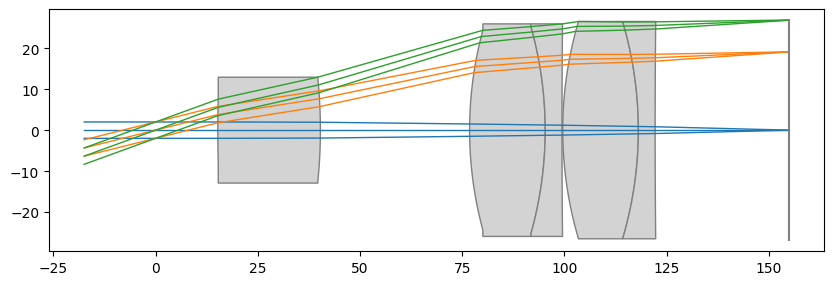

In [2]:
lens = EyepieceErfle()
lens.draw()

First, we'll view the wavefront.

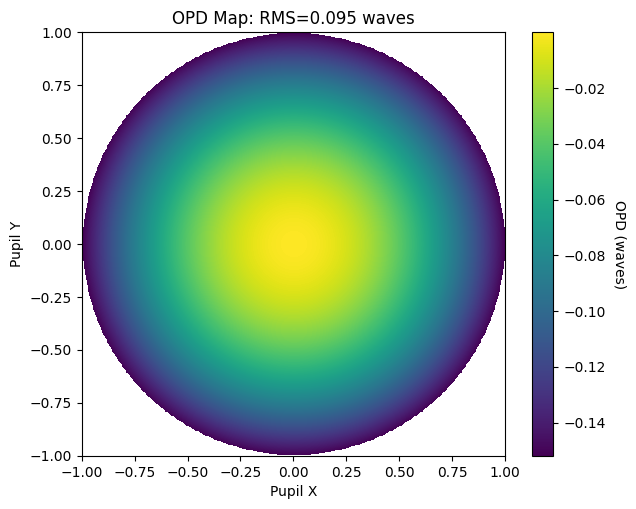

In [3]:
opd = wavefront.OPD(lens, field=(0, 0), wavelength=0.55)
opd.view(projection="2d", num_points=512)

We'll then find the Zernike coefficients of the wavefront.

In [4]:
zernike_standard = wavefront.ZernikeOPD(
    lens,
    field=(0, 0),
    wavelength=0.55,
    zernike_type="standard",
    num_terms=37,
)

Let's view the Zernike fit and compare it to the nominal OPD map.

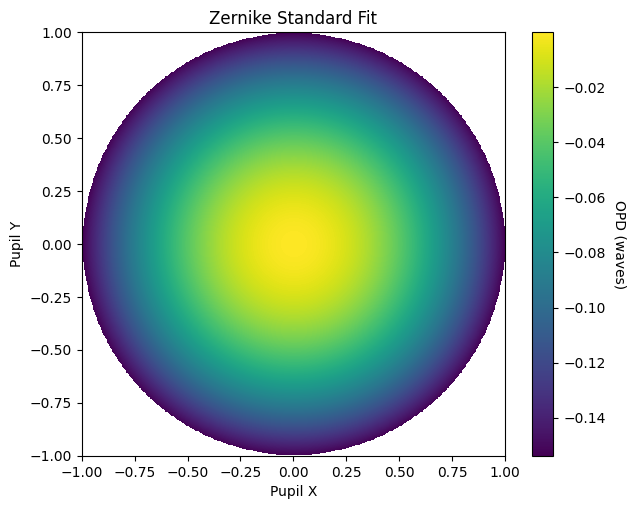

In [5]:
zernike_standard.view(projection="2d", num_points=512)

Qualitatively, we can see the Zernike fit well-represents the OPD map.

Let's see what the actual coefficients look like:

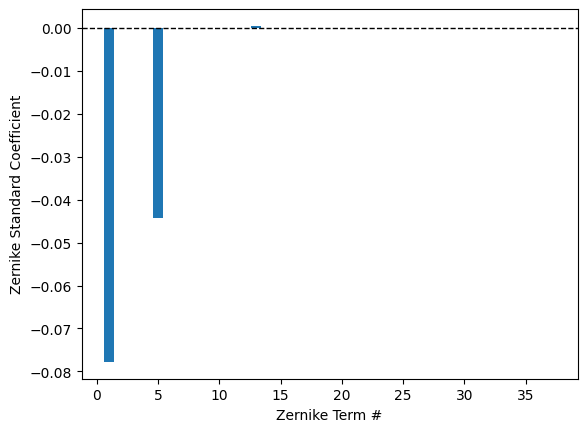

In [6]:
plt.bar(range(1, 38), zernike_standard.coeffs)
plt.axhline(color="k", linewidth=1, linestyle="--")
plt.xlabel("Zernike Term #")
plt.ylabel("Zernike Standard Coefficient")
plt.show()

Let's decompose the wavefront using Zernike fringe indices and Zernike Noll indices. We'll use the field point at (0, 1).

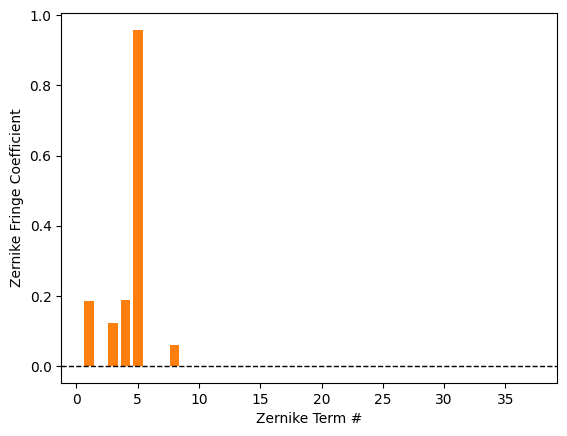

In [7]:
zernike_fringe = wavefront.ZernikeOPD(
    lens,
    field=(0, 1),
    wavelength=0.55,
    zernike_type="fringe",
    num_terms=37,
)

plt.bar(range(1, 38), zernike_fringe.coeffs, color="C1")
plt.axhline(color="k", linewidth=1, linestyle="--")
plt.xlabel("Zernike Term #")
plt.ylabel("Zernike Fringe Coefficient")
plt.show()

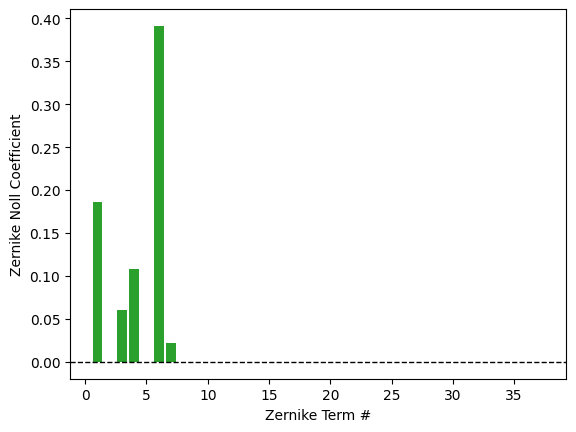

In [8]:
zernike_noll = wavefront.ZernikeOPD(
    lens,
    field=(0, 1),
    wavelength=0.55,
    zernike_type="noll",
    num_terms=37,
)

plt.bar(range(1, 38), zernike_noll.coeffs, color="C2")
plt.axhline(color="k", linewidth=1, linestyle="--")
plt.xlabel("Zernike Term #")
plt.ylabel("Zernike Noll Coefficient")
plt.show()

Or, if we just want to read off the coefficients, we can print them. Let's only use 9 terms in this case:

In [9]:
zernike = wavefront.ZernikeOPD(lens, (0, 1), 0.55, zernike_type="noll", num_terms=9)

for k in range(len(zernike.coeffs)):
    print(f"Z{k + 1}: {zernike.coeffs[k]:.8f}")

Z1: 0.18585891
Z2: -0.00000000
Z3: 0.06086925
Z4: 0.10781267
Z5: -0.00000000
Z6: 0.39115859
Z7: 0.02152073
Z8: -0.00000000
Z9: -0.00002531
